# Newton's and Langrange's methodes for finding polinomial interpolation

In [1]:
from math import cos, pi
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12,8]

## Distribution of n values in between a and b

### Even distribution of points

In [2]:
def even(n, a, b):
    n -= 1
    d = (b - a) / n
    result = [0] * (n + 1)
    result[0] = a
    result[n] = b
    for i in range(1, n):
        result[i] = result[i - 1] + d
    return result

### Chebyshev nodes

In [3]:
def chebyshev(n, a, b):
    result = [0] * n
    for i in range(n):
        result[i] = (a + b) / 2 + ((b - a) / 2) * cos((2 * i + 1) * pi / (2 * n))
    return result

## Methodes of finding interpolation

### Lagrange's methode for finding polinomial interpolation

In [4]:
def get_polynomial_L(X, Y):
    n = len(X)
    m = [1] * n
    for i in range(n):
        for j in range(n):
            if i != j:
                m[i] *= X[i] - X[j]
    
    def f(x):
        d = [1] * n
        for i in range(n):
            for j in range(n):
                if X[i] != X[j]:
                    d[i] *= x - X[j]
        P = 0
        for i in range(n):
            P += Y[i] * (d[i] / m[i])
        return P
    
    return f

### Newton's methode for finding polinomial interpolation

In [5]:
def get_polynomial_N(X, Y):
    n = len(X)

    def diff(X, Y):
        quotients = [[None] * n for i in range(n)]

        def curr(i, j):
            if quotients[i][j] is not None:
                pass
            elif i == j:
                quotients[i][j] = Y[i]
            else:
                f2 = curr(i + 1, j)
                f1 = curr(i, j - 1)
                quotients[i][j] = (f2 - f1) / (X[j] - X[i])
            return quotients[i][j]

        curr(0, n - 1)
        return quotients

    Q = diff(X, Y)

    def f(x):
        result = 0
        for i in range(n - 1, 0, -1):
            result += Q[0][i]
            result *= (x - X[i - 1])
        result += Q[0][0]
        return result

    return f

## Mapping an array of values x to an array of f(x)

In [6]:
def function_to_points(X, f): return [f(X[i]) for i in range(len(X))]

## Two methodes of comparing values in a function

### Finding the largest difference

In [7]:
def f_compare_max(Y1,Y2):
    diff = np.abs(Y1 - Y2)
    return np.max(diff)

### Summation of sqared difference of function value for each x in the scope

In [8]:
def f_compare_sqr(Y1,Y2):
    diff = np.square(Y1 - Y2)
    return np.sum(diff)

## Plot generation

In [9]:
def plot(X,Y,f1,f2,a,b):
    X2 = np.linspace(a,b,2000)
    Y1 = f1(X2)
    Y2 = f2(X2)
    plt.plot(X2,Y1,'g')
    plt.plot(X2, Y2, 'b')
    plt.scatter(X,Y,c='r',s=15,marker = 'o')
    plt.show()

## The problem

In [10]:
a,b = -2*pi,pi
def f(x): return np.exp(-3*np.sin(3*x))
X = np.linspace(a,b,2000)
Y = f(X)

## Evaluating for 8 nodes

In [11]:
n=8

In [12]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)

fcl = get_polynomial_L(xc, yc)
fcn = get_polynomial_N(xc, yc)
fel = get_polynomial_L(xe, ye)
fen = get_polynomial_N(xe, ye)

### Chebyshev + Lagrange

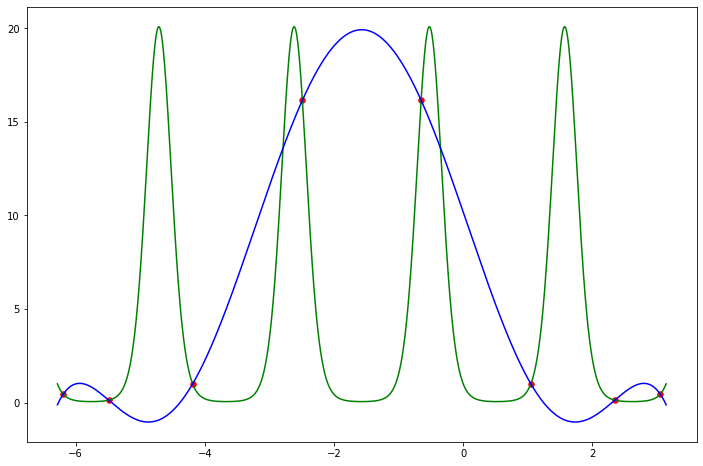

In [13]:
Ycl = fcl(X)
cl_max, cl_sqr = f_compare_max(Y,Ycl), f_compare_sqr(Y,Ycl)


plt.plot(X,Y,'g')
plt.plot(X, Ycl, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()


### Chebyshev + Newton

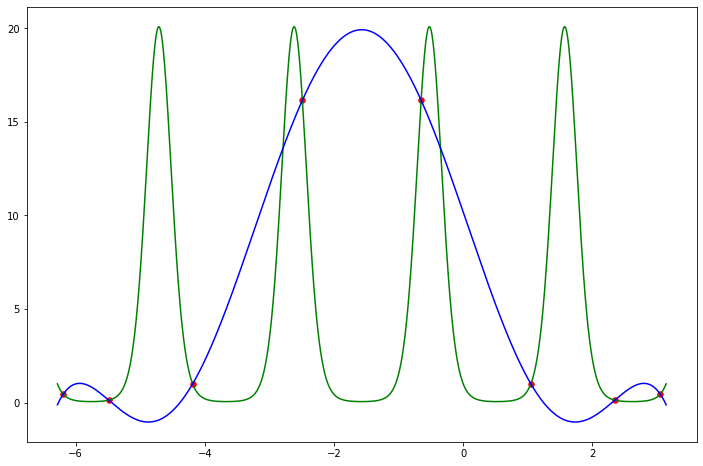

In [14]:
Ycn = fcn(X)
cn_max, cn_sqr = f_compare_max(Y,Ycn), f_compare_sqr(Y,Ycn)


plt.plot(X,Y,'g')
plt.plot(X, Ycn, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even + Lagrange

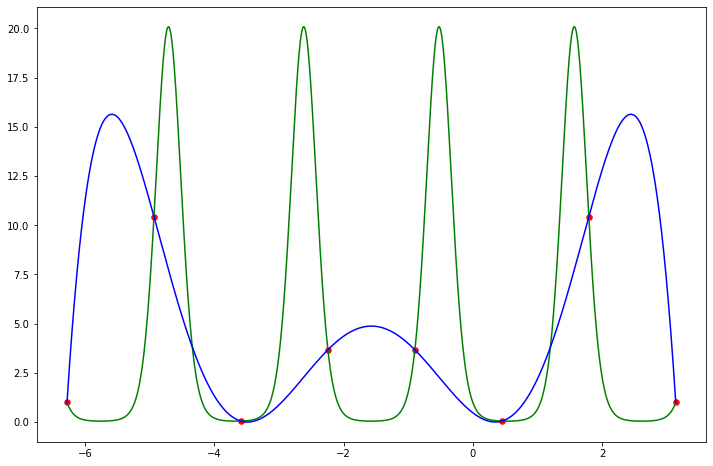

In [15]:
Yel = fel(X)
el_max, el_sqr = f_compare_max(Y,Yel), f_compare_sqr(Y,Yel)

plt.plot(X,Y,'g')
plt.plot(X, Yel, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

### Even + Newton

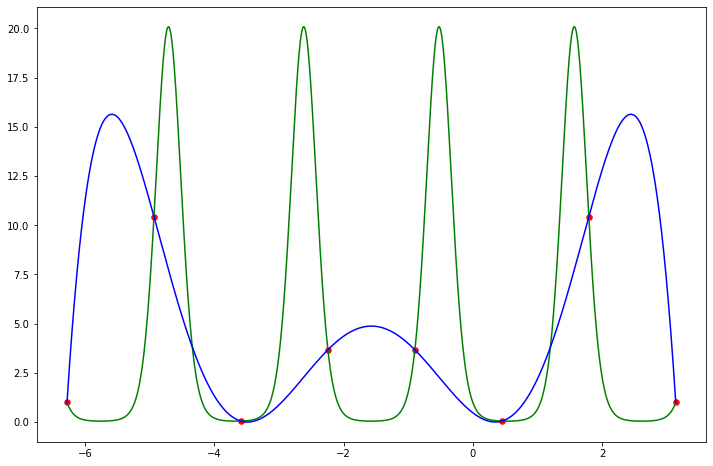

In [16]:
Yen = fen(X)
en_max, en_sqr = f_compare_max(Y,Yen), f_compare_sqr(Y,Yen)


plt.plot(X,Y,'g')
plt.plot(X, Yen, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [17]:
print("cl largest difference:   ",round(cl_max,2))
print("cn largest difference:   ",round(cn_max,2))
print("el largest difference:   ",round(el_max,2))
print("en largest difference:   ",round(en_max,2))
print("cl sum of squared values:",round(cl_sqr,2))
print("cn sum of squared values:",round(cn_sqr,2))
print("el sum of squared values:",round(el_sqr,2))
print("en sum of squared values:",round(en_sqr,2))

cl largest difference:    21.02
cn largest difference:    21.02
el largest difference:    17.81
en largest difference:    17.81
cl sum of squared values: 197129.4
cn sum of squared values: 197129.4
el sum of squared values: 148067.6
en sum of squared values: 148067.6


## Evaluating for 12 nodes

In [18]:
n=12

In [19]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)

fcl = get_polynomial_L(xc, yc)
fcn = get_polynomial_N(xc, yc)
fel = get_polynomial_L(xe, ye)
fen = get_polynomial_N(xe, ye)

### Chebyshev + Lagrange

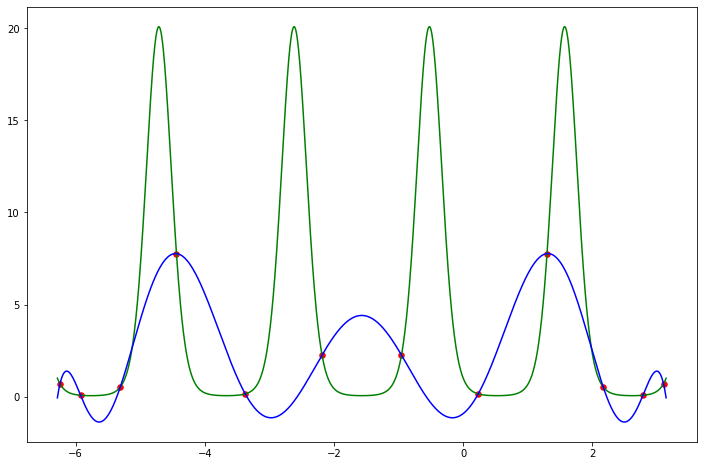

In [20]:
Ycl = fcl(X)
cl_max, cl_sqr = f_compare_max(Y,Ycl), f_compare_sqr(Y,Ycl)


plt.plot(X,Y,'g')
plt.plot(X, Ycl, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()


### Chebyshev + Newton

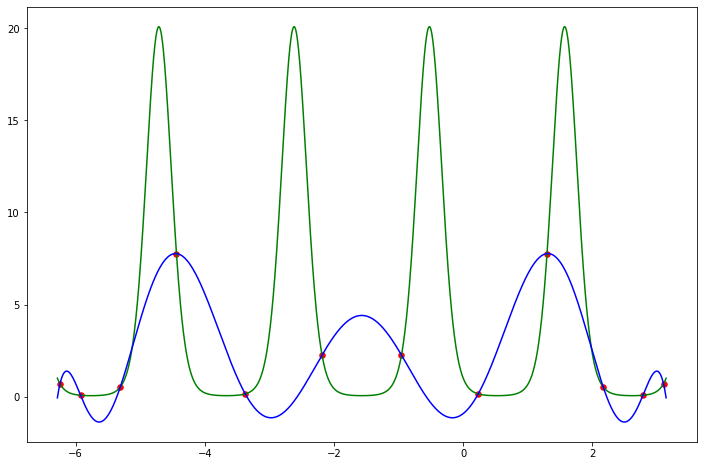

In [21]:
Ycn = fcn(X)
cn_max, cn_sqr = f_compare_max(Y,Ycn), f_compare_sqr(Y,Ycn)


plt.plot(X,Y,'g')
plt.plot(X, Ycn, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even + Lagrange

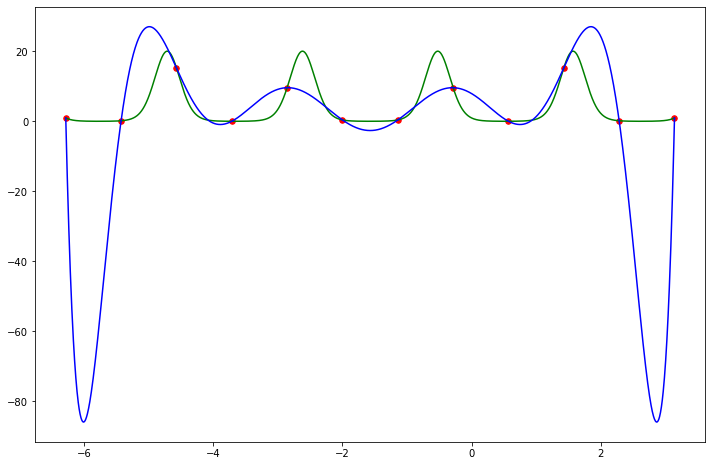

In [22]:
Yel = fel(X)
el_max, el_sqr = f_compare_max(Y,Yel), f_compare_sqr(Y,Yel)


plt.plot(X,Y,'g')
plt.plot(X, Yel, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

### Even + Newton

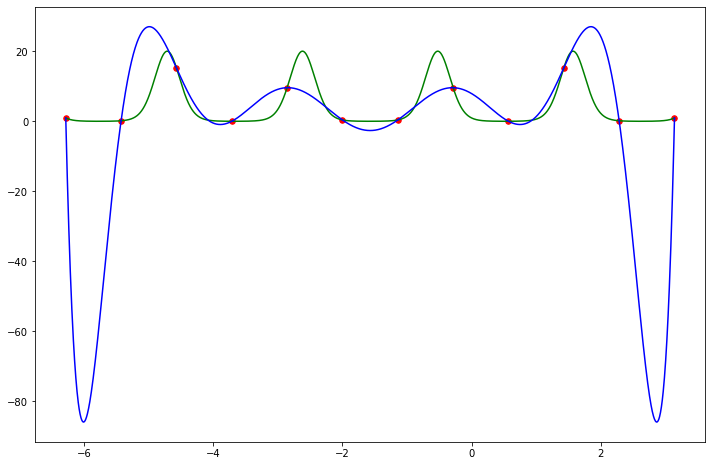

In [23]:
Yen = fen(X)
en_max, en_sqr = f_compare_max(Y,Yen), f_compare_sqr(Y,Yen)


plt.plot(X,Y,'g')
plt.plot(X, Yen, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [24]:
print("cl largest difference:   ",round(cl_max,2))
print("cn largest difference:   ",round(cn_max,2))
print("el largest difference:   ",round(el_max,2))
print("en largest difference:   ",round(en_max,2))
print("cl sum of squared values:",round(cl_sqr,2))
print("cn sum of squared values:",round(cn_sqr,2))
print("el sum of squared values:",round(el_sqr,2))
print("en sum of squared values:",round(en_sqr,2))

cl largest difference:    20.35
cn largest difference:    20.35
el largest difference:    86.04
en largest difference:    86.04
cl sum of squared values: 91942.43
cn sum of squared values: 91942.43
el sum of squared values: 1339709.55
en sum of squared values: 1339709.55


## Evaluating for 20 nodes

In [25]:
n=20

In [26]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)

fcl = get_polynomial_L(xc, yc)
fcn = get_polynomial_N(xc, yc)
fel = get_polynomial_L(xe, ye)
fen = get_polynomial_N(xe, ye)

### Chebyshev + Lagrange

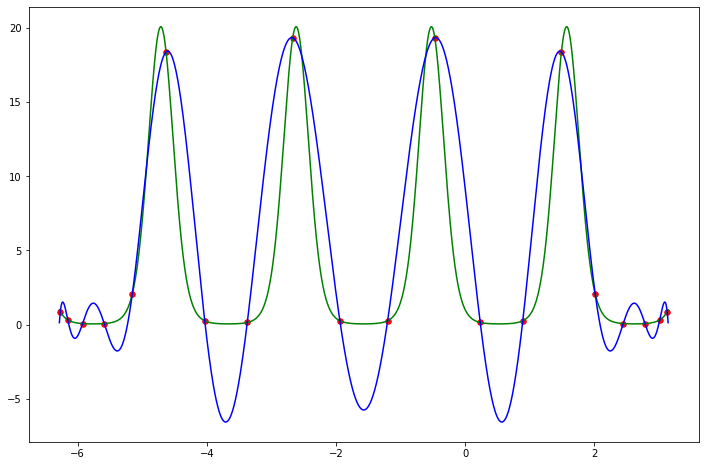

In [27]:
Ycl = fcl(X)
cl_max, cl_sqr = f_compare_max(Y,Ycl), f_compare_sqr(Y,Ycl)

plt.plot(X,Y,'g')
plt.plot(X, Ycl, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()


### Chebyshev + Newton

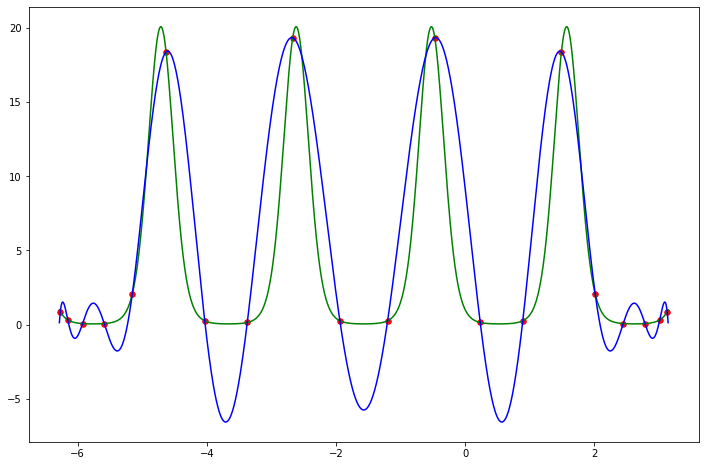

In [28]:
Ycn = fcn(X)
cn_max, cn_sqr = f_compare_max(Y,Ycn), f_compare_sqr(Y,Ycn)

plt.plot(X,Y,'g')
plt.plot(X, Ycn, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even + Lagrange

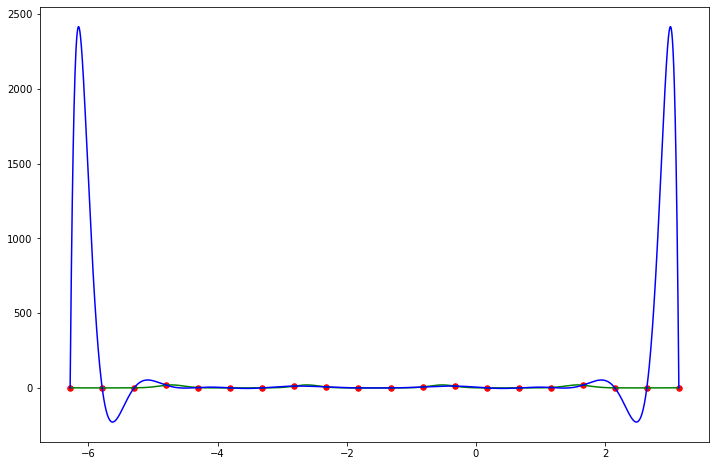

In [29]:
Yel = fel(X)
el_max, el_sqr = f_compare_max(Y,Yel), f_compare_sqr(Y,Yel)

plt.plot(X,Y,'g')
plt.plot(X, Yel, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

### Even + Newton

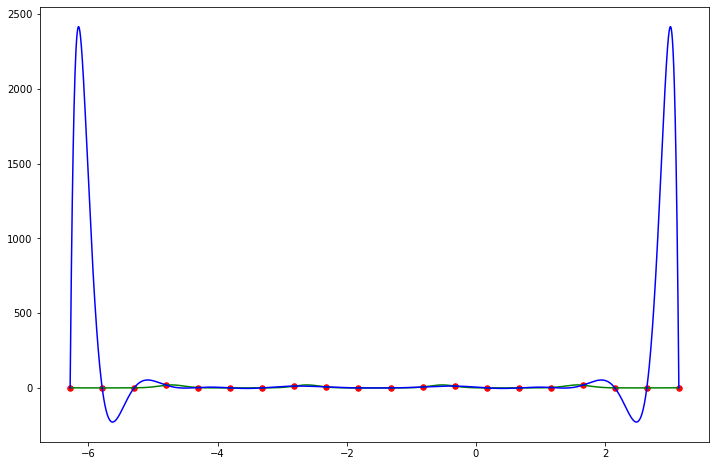

In [30]:
Yen = fen(X)
en_max, en_sqr = f_compare_max(Y,Yen), f_compare_sqr(Y,Yen)

plt.plot(X,Y,'g')
plt.plot(X, Yen, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [31]:
print("cl largest difference:   ",round(cl_max,2))
print("cn largest difference:   ",round(cn_max,2))
print("el largest difference:   ",round(el_max,2))
print("en largest difference:   ",round(en_max,2))
print("cl sum of squared values:",round(cl_sqr,2))
print("cn sum of squared values:",round(cn_sqr,2))
print("el sum of squared values:",round(el_sqr,2))
print("en sum of squared values:",round(en_sqr,2))

cl largest difference:    10.73
cn largest difference:    10.73
el largest difference:    2414.86
en largest difference:    2414.86
cl sum of squared values: 42238.15
cn sum of squared values: 42238.15
el sum of squared values: 507499767.71
en sum of squared values: 507499767.7


## Evaluating for 30 nodes

In [32]:
n=30

In [33]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)

fcl = get_polynomial_L(xc, yc)
fcn = get_polynomial_N(xc, yc)
fel = get_polynomial_L(xe, ye)
fen = get_polynomial_N(xe, ye)

### Chebyshev + Lagrange

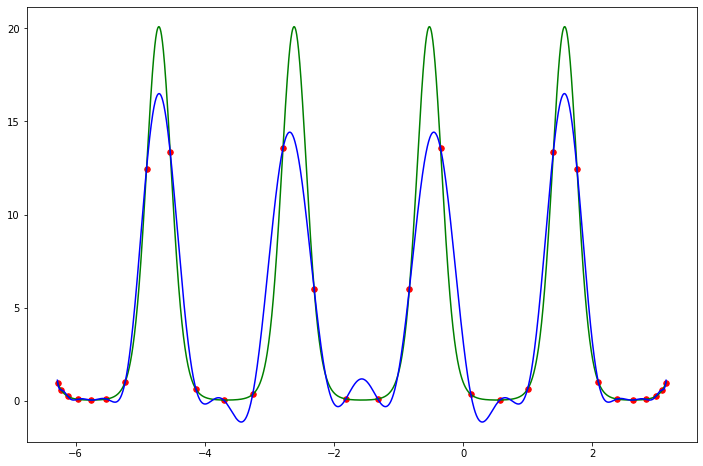

In [34]:
Ycl = fcl(X)
cl_max, cl_sqr = f_compare_max(Y,Ycl), f_compare_sqr(Y,Ycl)

plt.plot(X,Y,'g')
plt.plot(X, Ycl, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()


### Chebyshev + Newton

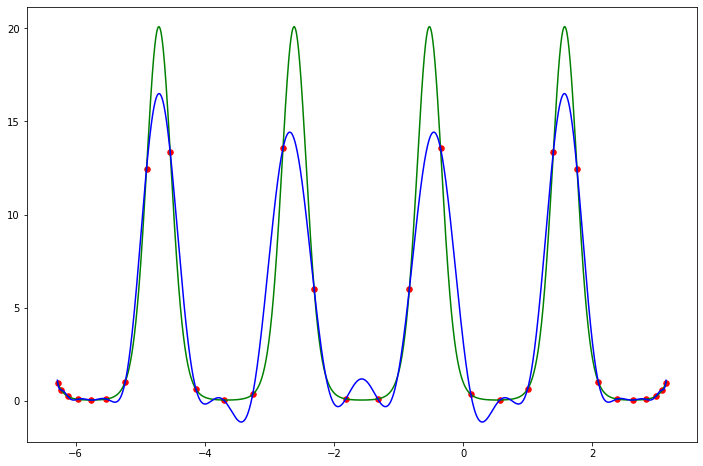

In [35]:
Ycn = fcn(X)
cn_max, cn_sqr = f_compare_max(Y,Ycn), f_compare_sqr(Y,Ycn)

plt.plot(X,Y,'g')
plt.plot(X, Ycn, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even + Lagrange

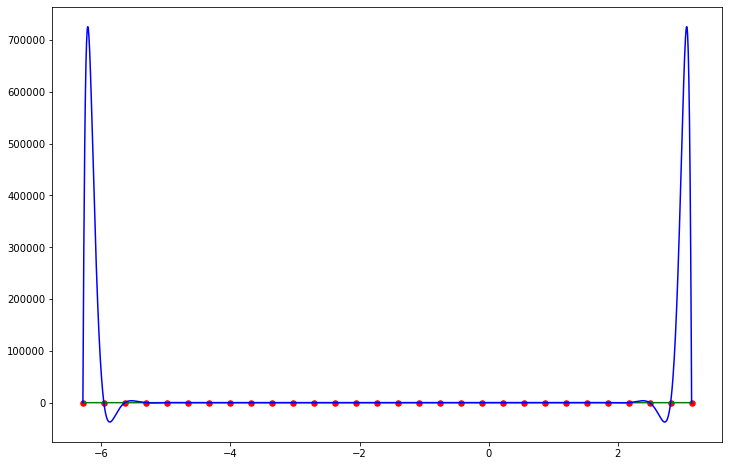

In [36]:
Yel = fel(X)
el_max, el_sqr = f_compare_max(Y,Yel), f_compare_sqr(Y,Yel)

plt.plot(X,Y,'g')
plt.plot(X, Yel, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

### Even + Newton

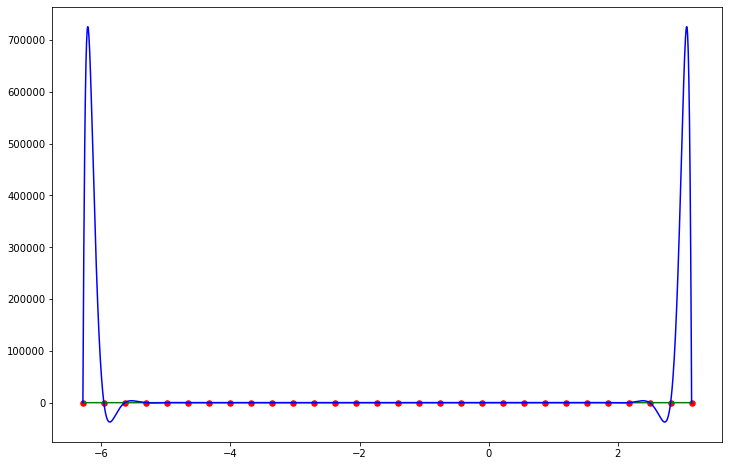

In [37]:
Yen = fen(X)
en_max, en_sqr = f_compare_max(Y,Yen), f_compare_sqr(Y,Yen)

plt.plot(X,Y,'g')
plt.plot(X, Yen, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [38]:
print("cl largest difference:   ",round(cl_max,2))
print("cn largest difference:   ",round(cn_max,2))
print("el largest difference:   ",round(el_max,2))
print("en largest difference:   ",round(en_max,2))
print("cl sum of squared values:",round(cl_sqr,2))
print("cn sum of squared values:",round(cn_sqr,2))
print("el sum of squared values:",round(el_sqr,2))
print("en sum of squared values:",round(en_sqr,2))

cl largest difference:    6.17
cn largest difference:    6.17
el largest difference:    725718.76
en largest difference:    725718.76
cl sum of squared values: 6979.19
cn sum of squared values: 6979.19
el sum of squared values: 27520164119715.06
en sum of squared values: 27520164109529.35


## Evaluating for 50 nodes

In [39]:
n=50

In [40]:
xc = np.array(chebyshev(n, a, b))
yc = f(xc)

# even distribution
xe = np.array(even(n, a, b))
ye = f(xe)

fcl = get_polynomial_L(xc, yc)
fcn = get_polynomial_N(xc, yc)
fel = get_polynomial_L(xe, ye)
fen = get_polynomial_N(xe, ye)

### Chebyshev + Lagrange

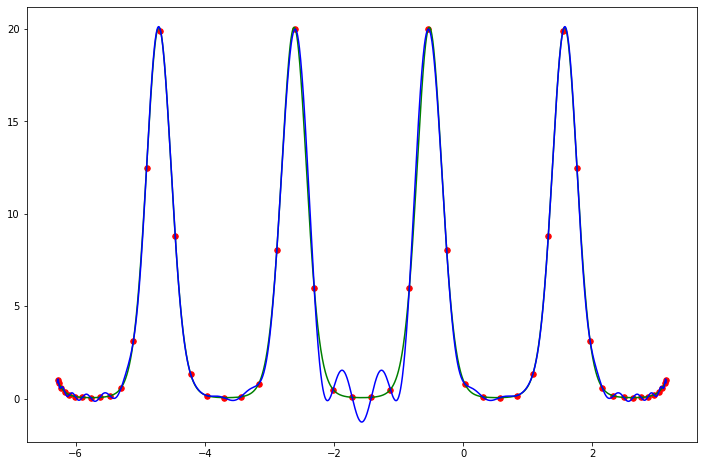

In [41]:
Ycl = fcl(X)
cl_max, cl_sqr = f_compare_max(Y,Ycl), f_compare_sqr(Y,Ycl)

plt.plot(X,Y,'g')
plt.plot(X, Ycl, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()


### Chebyshev + Newton

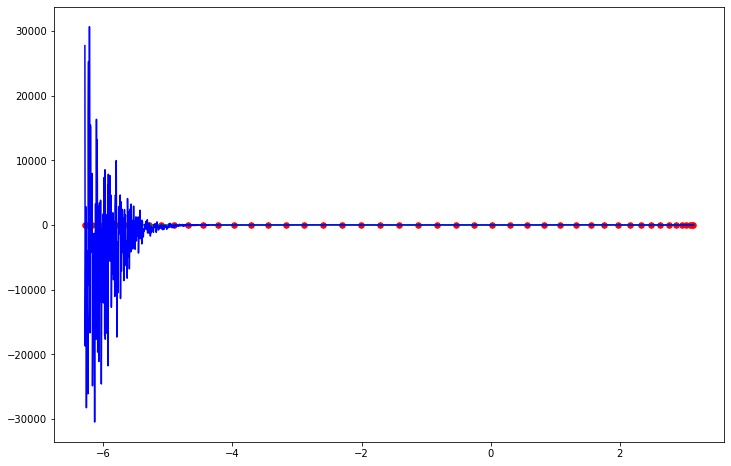

In [42]:
Ycn = fcn(X)
cn_max, cn_sqr = f_compare_max(Y,Ycn), f_compare_sqr(Y,Ycn)

plt.plot(X,Y,'g')
plt.plot(X, Ycn, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

### Even + Lagrange

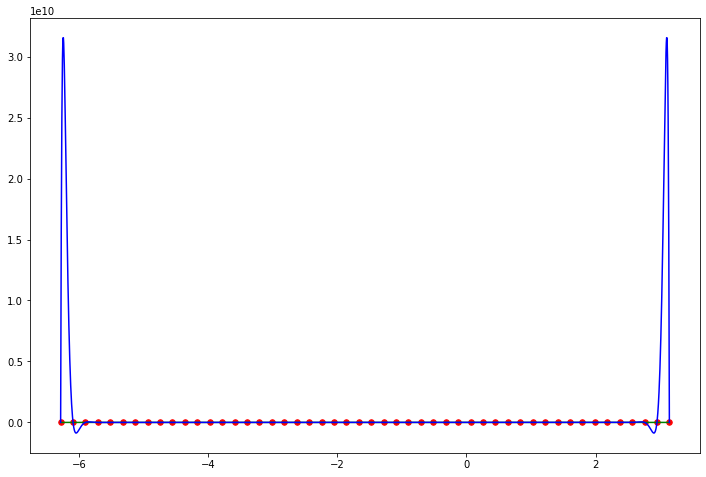

In [43]:
Yel = fel(X)
el_max, el_sqr = f_compare_max(Y,Yel), f_compare_sqr(Y,Yel)

plt.plot(X,Y,'g')
plt.plot(X, Yel, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

### Even + Newton

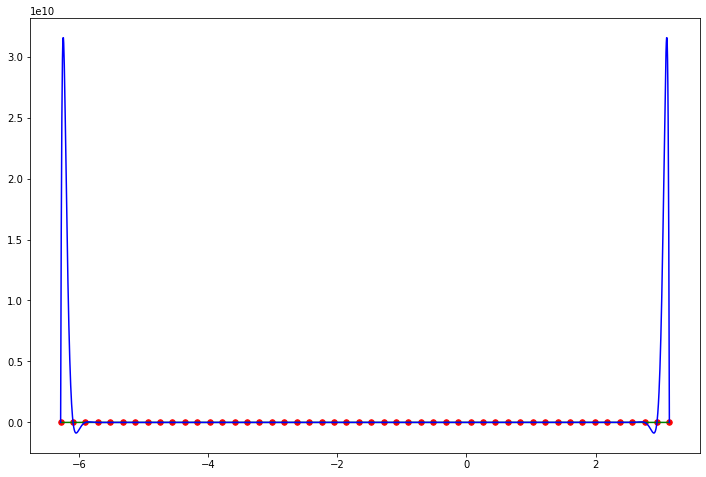

In [44]:
Yen = fen(X)
en_max, en_sqr = f_compare_max(Y,Yen), f_compare_sqr(Y,Yen)

plt.plot(X,Y,'g')
plt.plot(X, Yen, 'b')
plt.scatter(xe,ye,c='r',s=30,marker = 'o')

plt.show()

In [45]:
print("cl largest difference:   ",round(cl_max,2))
print("cn largest difference:   ",round(cn_max,2))
print("el largest difference:   ",round(el_max,2))
print("en largest difference:   ",round(en_max,2))
print("cl sum of squared values:",round(cl_sqr,2))
print("cn sum of squared values:",round(cn_sqr,2))
print("el sum of squared values:",round(el_sqr,2))
print("en sum of squared values:",round(en_sqr,2))

cl largest difference:    1.49
cn largest difference:    30637.03
el largest difference:    31556257600.15
en largest difference:    31556257600.15
cl sum of squared values: 433.7
cn sum of squared values: 17096519786.64
el sum of squared values: 2.827739388709302e+22
en sum of squared values: 2.8277004937746478e+22
